In [146]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt;
%matplotlib inline


In [147]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


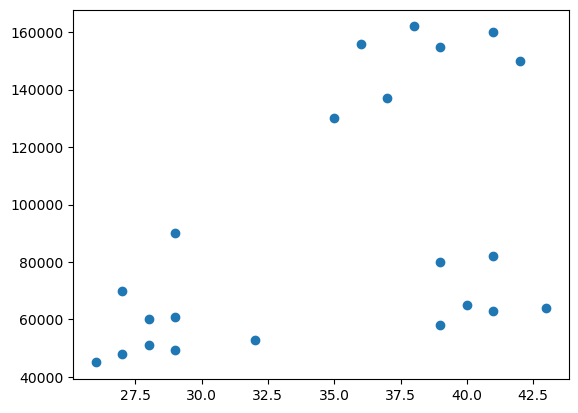

In [148]:
plt.scatter(df['Age'],df['Income($)'])
plt.show()

In [149]:
km= KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [150]:
y_predicted= km.fit_predict(df[['Age','Income($)']])
y_predicted

c:\Users\Arham\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [151]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


C:\Users\Arham\AppData\Local\Temp\ipykernel_4320\949531319.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


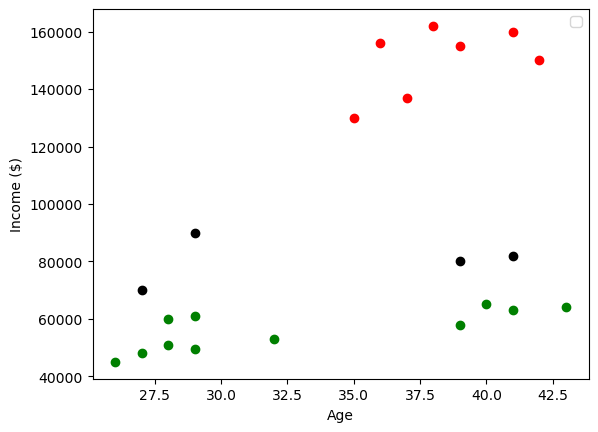

In [152]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
#plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()
plt.show()

some points are not grouped correctly. This happens because the measures on y axis is very big and on x axis ix very narrow. We have to scale these two features properly to solve this problem. We are going to use minMax scaler to do this.

In [153]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])

MinMaxScaler()

In [154]:
df['Income($)']= scaler.transform(df[['Income($)']])
df.head()

,Name,Age,Income($),cluster
0,Rob,27,0.213675,2
1,Michael,29,0.384615,2
2,Mohan,29,0.136752,0
3,Ismail,28,0.128205,0
4,Kory,42,0.897436,1


In [155]:
scaler.fit(df[['Age']])
df['Age']= scaler.transform(df[['Age']])
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [156]:
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [157]:
km = KMeans(n_clusters=3)
y_predicted= km.fit_predict(df[['Age','Income($)']])
y_predicted


c:\Users\Arham\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [158]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [159]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

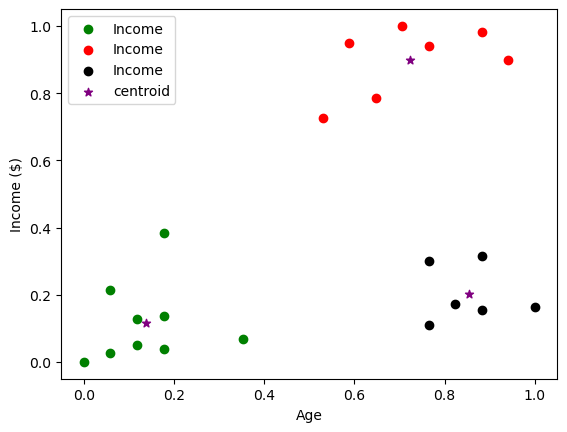

In [160]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green',label='Income')
plt.scatter(df2.Age,df2['Income($)'],color='red',label='Income')
plt.scatter(df3.Age,df3['Income($)'],color='black',label='Income')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()
plt.show()

in real life data, we wont know how many clusters will be enough. We are goint to use something called elbow plot. The model will test numbers of clusters automatically and decide how much  cluster is good for the model
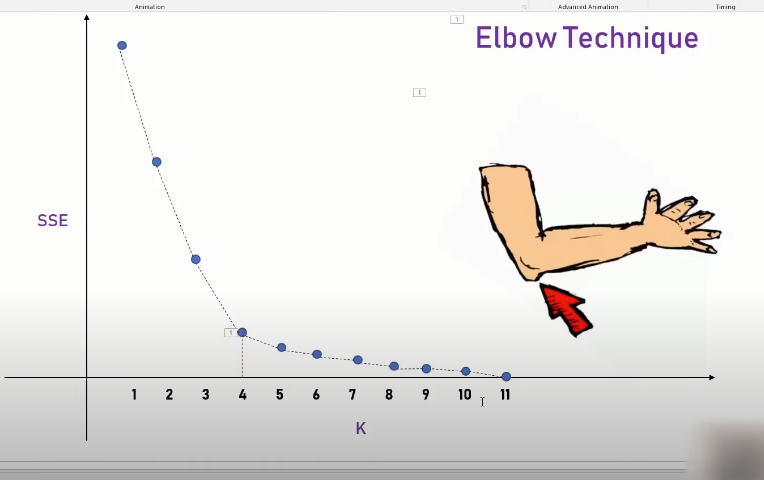

In [ ]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)
    
 

In [164]:
sse

[5.434011511988178,
 2.0911363886990775,
 0.4750783498553096,
 0.3923766528801946,
 0.286071710668944,
 0.3379255601034209,
 0.20320413291201161,
 0.14417954691813867,
 0.10188787724979426]

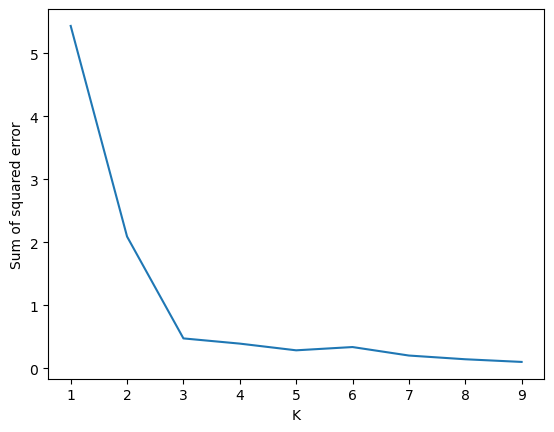

In [165]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)
plt.show()

So we can see from here that 3 has the best drop thus we will use it